<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У нас есть файлы с результатами SQL-запросов.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

Загрузим все необходимые библиотеки и импортируем данные

In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

kolvo_reis_po_model = pd.read_csv('/datasets/query_1.csv')
sr_kolvo_reis_za_den = pd.read_csv('/datasets/query_3.csv')

Посмотрим на наши данные

In [2]:
display(kolvo_reis_po_model)
display(kolvo_reis_po_model.info())
display(kolvo_reis_po_model.describe())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Посмотрим второй файл

In [3]:
display(sr_kolvo_reis_za_den)
display(sr_kolvo_reis_za_den.info())
display(sr_kolvo_reis_za_den.describe())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Типы данных корректны, отражают действительные значения.

Выберем топ-10 городов по количеству рейсов

In [4]:
top_10 = sr_kolvo_reis_za_den.sort_values(by = 'average_flights', ascending = 'True').tail(10)

Здесь почему-то не сработал метод обратной сортировки. Т.е. "ascending = 'False'".

А так, получили список 10 городов, в которые самолеты летают чаще всего.

Теперь построим следующие графики: 
 - модели самолётов и количество рейсов, 
 - города и количество рейсов, 
 - топ-10 городов и количество рейсов.

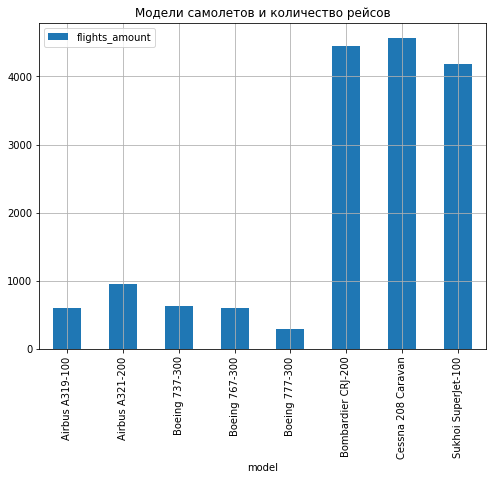

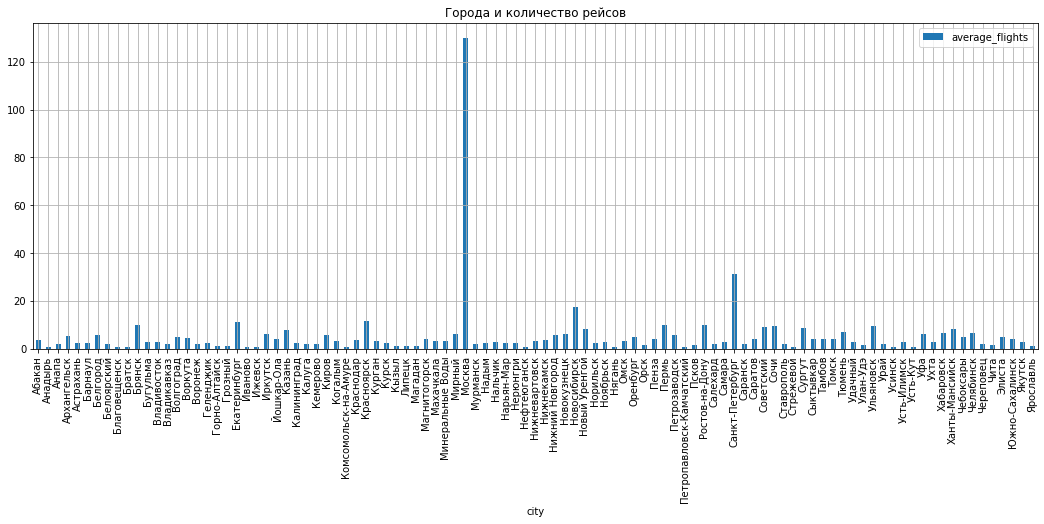

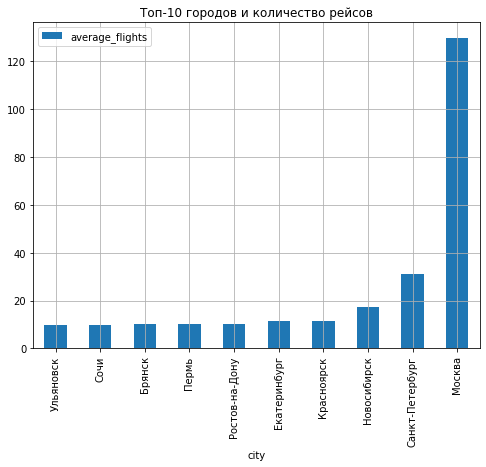

In [5]:
a1 = kolvo_reis_po_model.plot(kind = 'bar', y = 'flights_amount', grid = True, x = 'model', figsize = (8,6))
a1.set_title('Модели самолетов и количество рейсов')
plt.show()

a2 = sr_kolvo_reis_za_den.plot(kind = 'bar', y = 'average_flights', grid = True, figsize = (18,6), x = 'city')
a2.set_title('Города и количество рейсов')
plt.show()

a3 = top_10.plot(kind = 'bar', y = 'average_flights', grid = True, x = 'city', figsize = (8,6))
a3.set_title('Топ-10 городов и количество рейсов')
plt.show()

Выводы напрашиваются следующие:
 - Среди моделей явно выделяющихся на фоне остальных, совершавших полеты в сентябре 2018, являются: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100	4185. Все они совершили более 4тыс. полетов. В то время, как у других моделей численность полетов колеблется в диапазоне от 300 до 960;
 - Среднее количество полетов за день в разных городах сильно отличается. Где-то этот показатель равен 1 (так, например в г.Анадырь), а где-то почти 130 (г.Москва);
 - Города, в которые чаще всего ежедневно залетали самолеты в сентябре 2018, следующие: Ульяновск, Сочи, Брянск, Пермь, Ростов-на-Дону, Екатеринбург, Красноярск, Новосибирск, Санкт-Петербург, Москва. Среди них 7 городов-миллионников. Также стоит отдать должное столице РФ, ведь именно этот город принимает бОльшее количество самолетов в день, по сравнению с другими. На втором месте идет Санкт-Петербург, а на третьем - Новосибирск.
 
Отсюда можно сделать предположение, что скорее всего именно в Москве проходило больше всего фестивалей, поскольку спрос пассажиров на рейсы в этом направлении был наиболее высокий.